In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [115]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=3)

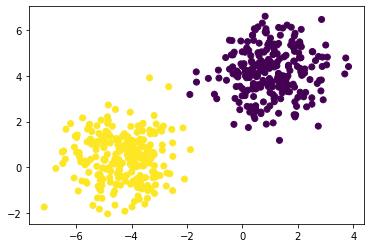

In [87]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [173]:
class Perceptron:
    
    def __init__(self):
        self.w=0
    
    def sigmoid(self,z):
        return (1.0/(1+np.exp(-z)));
    def predict(self,x,w):
        
        z=np.dot(x,w)
        return self.sigmoid(z)
    def gradient(self,x,y,w):
        y_bar=self.predict(x,w)
        
        return np.dot(x.T,y_bar-y)
    
    def loss(self,x,y,w):
        y_bar=self.predict(x,w)
        
        return (-y*np.log(y_bar) -(1-y)*np.log(1-y_bar)).mean()
    def accuracy(self,x,y):
        b=np.ones((x.shape[0],1))
        y=y.reshape((-1,1))
        
        newX=np.hstack((x,b))
        y_=self.predict(newX,self.w)
        y_=y_>0.5
        return ((y_==y).sum())/(y.shape[0])
        
    def train(self,X,Y,learning_rate=0.01,itr=500):
        b=np.ones((X.shape[0],1))
        Y=Y.reshape((-1,1))
        newX=np.hstack((X,b))
        
        w=np.ones((newX.shape[1],1))
        losses=[]
        m=newX.shape[0]
        for i in range(itr):
            l=self.loss(newX,Y,w)
            losses.append(l);
            delta=self.gradient(newX,Y,w)
            w=w-learning_rate*delta/(float(m));
        self.w=w;
        
        return losses,w;
        

In [174]:
PerceptronModel=Perceptron()

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [176]:
loss,w=PerceptronModel.train(x_train,y_train)

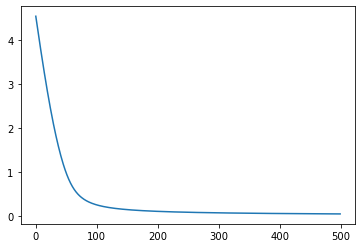

In [177]:
plt.plot(loss)
plt.show()

In [178]:
PerceptronModel.accuracy(x_test,y_test)

0.992

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])